# Machine Learning

In [2]:
# Pacotes
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
import imblearn
from imblearn.over_sampling import SMOTE
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

### Carregando Dados


In [3]:
df = pd.read_csv('dados/dataset.csv')

In [4]:
df.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1
225,26,Male,0.6,0.2,120,45,51,7.9,4.0,1.00,1
568,20,Female,16.7,8.4,200,91,101,6.9,3.5,1.02,1
520,62,Male,1.8,0.9,224,69,155,8.6,4.0,0.80,1
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
302,50,Female,1.7,0.6,430,28,32,6.8,3.5,1.00,1
268,40,Male,14.5,6.4,358,50,75,5.7,2.1,0.50,1
364,21,Male,0.8,0.2,183,33,57,6.8,3.5,1.00,2
540,42,Male,0.8,0.2,114,21,23,7.0,3.0,0.70,2
387,51,Male,0.8,0.2,160,34,20,6.9,3.7,1.10,1


In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
def ecod_func_D (x):
    if x == 1:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(ecod_func_D)


In [7]:
df['Dataset'].value_counts()

0    416
1    167
Name: Dataset, dtype: int64

In [8]:
def ecod_func (x):
    if x == 'Male':
        return 0
    return 1

In [9]:
df['Gender'] = df['Gender'].map(ecod_func)


In [10]:
df['Gender'].value_counts()

0    441
1    142
Name: Gender, dtype: int64

### Análise Exploratoria 

In [11]:
df.dtypes

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

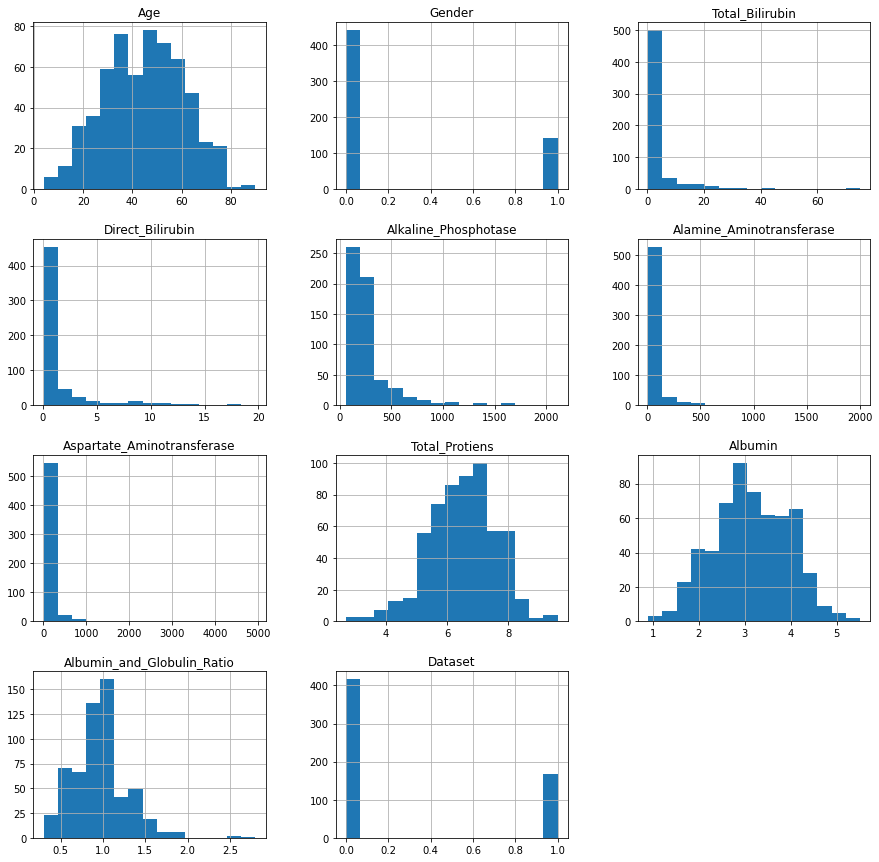

In [12]:
df.hist(figsize = (15, 15), bins = 15)
plt.show()

In [17]:

lista_col = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']

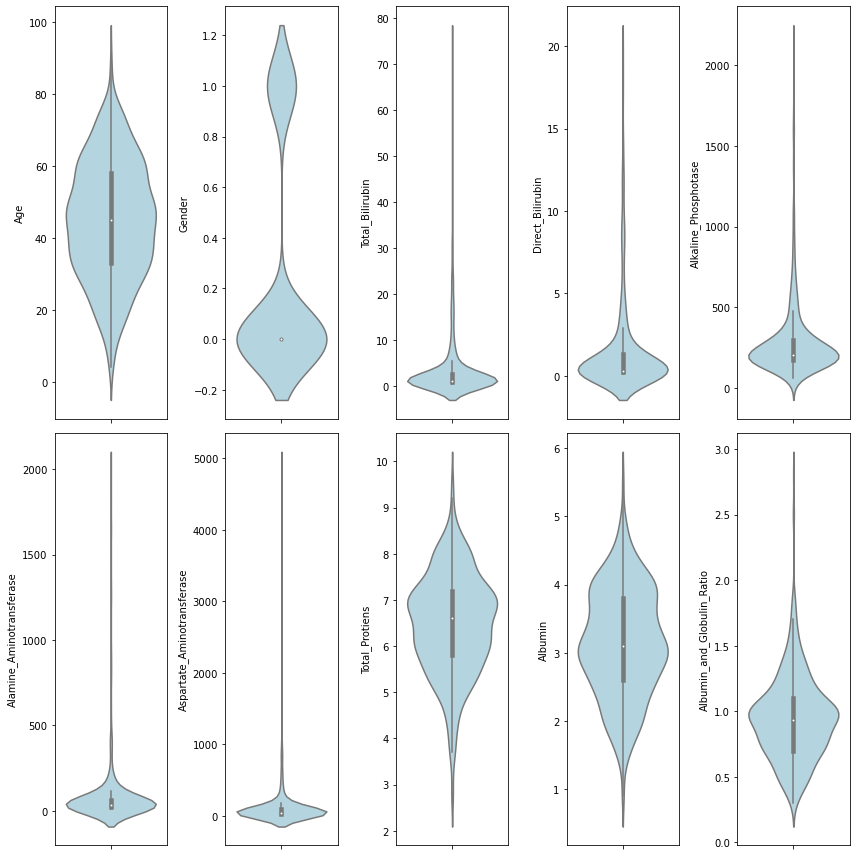

In [18]:
plt.figure(figsize= (12,12))
for i in range(0, len(lista_col)):
    plt.subplot(2, int(len(lista_col)/2), i + 1)
    sns.violinplot(y = df[lista_col[i]], 
                   color = 'lightblue')
    plt.tight_layout()

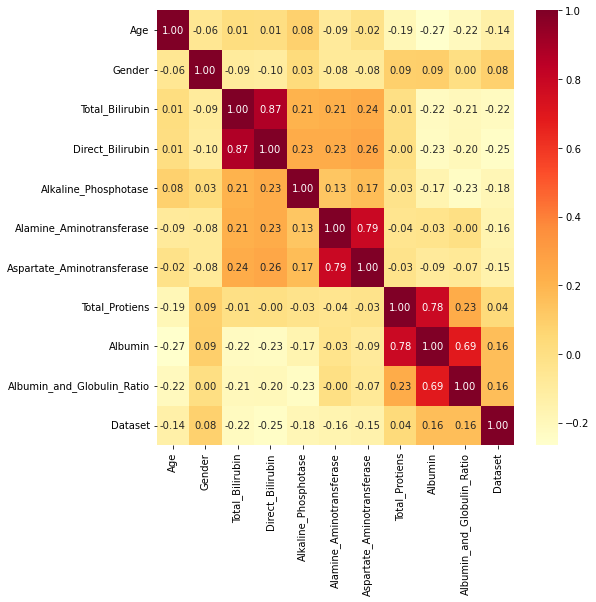

In [19]:
#Analise de correlação 
corr_df = df.corr()
plt.figure(figsize= (8,8))

sns.heatmap(corr_df,
           cmap = 'YlOrRd',
           annot = True,
           fmt = '.2f');

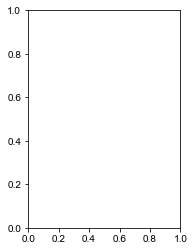

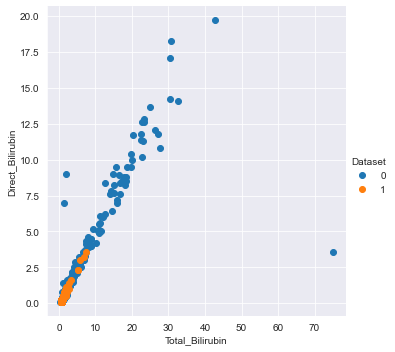

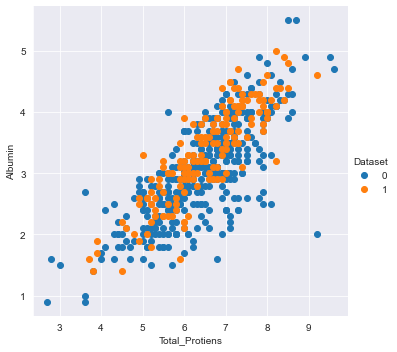

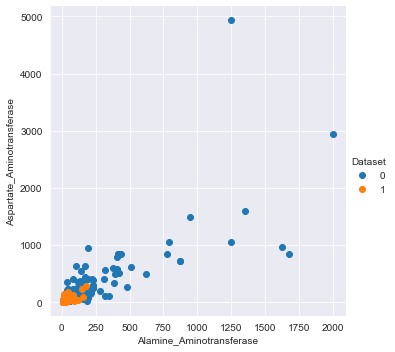

In [20]:
#Facegrid para detecção de multicolinearidade
plt.subplot(1, 2, 2)
sns.set_style('darkgrid')
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend();
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Total_Protiens', 'Albumin').add_legend();
sns.FacetGrid(df, hue = 'Dataset', size = 5).map(plt.scatter, 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase').add_legend();

### Limpando Valores Ausentes, Registros Duplicados e Outliers


In [21]:
df[df.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,0
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,0
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,1
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,1


In [24]:
# Tratamento de Valores NA
df = df.dropna(how = 'any')
df[df.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [25]:
# Tratamento de Valores Duplicados
df = df.drop_duplicates()
df.shape

(566, 11)

In [42]:
registros = np.array([True] * len(df))
lista_col_nums = ['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']
# Loop por cada variável numérica
for col in lista_col_nums:
    
    # Calcula o z-score absoluto
    zscore = abs(stats.zscore(df[col])) 
    
    # Mantém valores com menos de t z-score absoluto
    registros = (zscore < 7) & registros

In [43]:
np.count_nonzero(registros == True)

560

In [44]:
np.count_nonzero(registros == False)

6

In [45]:
df[registros == False].describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,43.333333,0.0,18.050000,3.350000,702.666667,1108.000000,1640.000000,6.200000,3.000000,0.966667,0.0
std,14.023789,0.0,28.294222,2.301087,772.025561,857.871785,1923.160628,0.846168,0.589915,0.355903,0.0
min,32.000000,0.0,1.100000,0.300000,194.000000,40.000000,66.000000,4.900000,2.400000,0.500000,0.0
25%,33.250000,0.0,3.050000,1.800000,232.500000,348.500000,279.250000,5.825000,2.575000,0.675000,0.0
50%,37.000000,0.0,8.750000,3.300000,286.000000,1440.000000,905.000000,6.200000,2.900000,1.050000,0.0
75%,51.250000,0.0,12.350000,5.100000,915.500000,1667.500000,2449.500000,6.800000,3.225000,1.275000,0.0
max,66.000000,0.0,75.000000,6.200000,2110.000000,2000.000000,4929.000000,7.200000,4.000000,1.300000,0.0


In [46]:
df = df[registros]

In [47]:
df.shape

(560, 11)

### Pré-Processamento dos Dados

#### Retirar Variáveis com Multicoliriariedade

In [48]:
df.drop('Direct_Bilirubin', 1 , inplace= True)

#### Padronização dos Dados

In [49]:
# Aplicando padronização
df_Stdrd_Sclr = df.drop('Dataset', 1)
scaled_features = StandardScaler().fit_transform(df_Stdrd_Sclr.values)
df_Stdrd_Sclr = pd.DataFrame(scaled_features, index= df_Stdrd_Sclr.index, columns= df_Stdrd_Sclr.columns)

In [50]:
df_Stdrd_Sclr.sample(5)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
465,0.005918,1.748706,-0.468279,-0.078291,-0.371434,-0.310230,-1.283787,-1.438965,-1.402510
380,0.312803,-0.571852,-0.268722,0.184499,-0.266760,-0.243965,0.736427,0.317182,-0.149720
181,1.847224,-0.571852,-0.051023,-0.302308,-0.290915,-0.340350,-3.212173,-2.066161,0.163478
313,-0.914734,1.748706,-0.431996,-0.560790,-0.355330,-0.430712,1.287395,1.697011,1.103071
14,0.987948,-0.571852,-0.450138,-0.616794,-0.129879,-0.316254,-0.640992,-0.560892,-0.243679


In [52]:
df_Stdrd_Sclr['Dataset'] = df.Dataset
df = df_Stdrd_Sclr

In [53]:
df.sample(5)

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
16,-0.423719,-0.571852,-0.250581,0.231887,0.796081,2.093382,1.011911,1.571572,1.103071,0
218,-2.387778,-0.571852,-0.468279,0.003562,-0.250656,-0.382519,-1.559271,-1.438965,-0.776115,1
53,-0.423719,-0.571852,-0.377572,-0.388469,0.135831,0.340372,-0.181852,0.442621,0.789873,0
467,-1.037488,1.748706,-0.395713,-0.853735,-0.411693,0.087360,0.277287,-0.059136,-0.462917,1
24,1.110702,-0.571852,-0.413855,-0.405701,-0.137931,-0.292158,-0.457336,0.944377,2.825658,1


#### Divisão dos Dados

In [54]:
# Variável Alvo
y = df.Dataset
y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 560, dtype: int64

In [55]:
#Retirando Variavel Alvo do Dataset
x = df.drop('Dataset', 1)
x

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.233455,1.748706,-0.450138,-0.435857,-0.427797,-0.454808,0.277287,0.191743,-0.149720
1,1.049325,-0.571852,1.400303,1.769853,-0.041309,0.039167,0.920083,0.066304,-0.650836
2,1.049325,-0.571852,0.747206,0.869475,-0.073516,-0.153604,0.460943,0.191743,-0.181039
3,0.803817,-0.571852,-0.395713,-0.457397,-0.443900,-0.442760,0.277287,0.317182,0.163478
4,1.663093,-0.571852,0.130393,-0.401393,-0.339226,-0.207820,0.736427,-0.937209,-1.715708
...,...,...,...,...,...,...,...,...,...
578,0.926571,-0.571852,-0.486421,0.912555,-0.395589,-0.358423,-0.549164,-1.940722,-1.809667
579,-0.300966,-0.571852,-0.468279,-0.819271,-0.274812,-0.376495,-0.457336,0.066304,0.476676
580,0.435556,-0.571852,-0.431996,-0.185991,-0.170138,-0.268061,-0.090024,0.066304,0.163478
581,-0.853357,-0.571852,-0.341288,-0.448781,-0.323123,-0.370471,0.277287,0.317182,0.163478


In [57]:
#Separando Dados
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 1234,
                                                    stratify= df.Dataset)

#### Balanceamento de Classe

In [58]:
# Caso necessário a intalação do pacote
#conda install -c conda-forge imbalanced-learn

In [60]:
y_train.value_counts()

0    298
1    122
Name: Dataset, dtype: int64

In [62]:
# Aplicação de Oversampling para Aumento de exemplos da Classe Minoritária

over_sampler = SMOTE(k_neighbors= 2)
x_over_train, y_over_train = over_sampler.fit_resample(x_train, y_train)


In [63]:
y_over_train.value_counts()


1    298
0    298
Name: Dataset, dtype: int64

### Primeiro Modelo: Regressão Logística (Modelo Base)

In [64]:
# Dicionário de Hiperparâmetros

params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
            'penalty': ['l1', 'l2', 'none','elasticnet']}

In [65]:
# Modelo Base

model_v1 = GridSearchCV(LogisticRegression(), 
                        params_v1,
                        scoring= 'roc_auc',
                        n_jobs= -1)

In [66]:
model_v1.fit(x_over_train, y_over_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2', 'none', 'elasticnet']},
             scoring='roc_auc')

In [67]:
# Melhores Parâmetros
model_v1.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [68]:
# Fazendo Previsões
y_prev_v1 = model_v1.predict(x_test)

In [73]:
#Provabilidade da Previsão
y_prev_prob_v1 = model_v1.predict_proba(x_test)[:,1]

In [75]:
# Matriz de Confusão 
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_prev_v1).ravel()

In [76]:
# ROC score
roc_auc_v1 = roc_auc_score(y_test, y_prev_v1)
roc_auc_v1

0.7549999999999999

In [77]:
# AUC Score
fpr_v1, tpr_v1, thresholds = roc_curve(y_test, y_prev_prob_v1)
auc_v1 = auc(fpr_v1,tpr_v1)
auc_v1

0.8015

In [78]:
# Acurácia 
acc_v1 = accuracy_score(y_test, y_prev_v1)
acc_v1

0.7142857142857143

In [79]:
# Salvando Modelo Base
with open('modelos/modelo_v1.pkl', 'wb') as pickle_file:
    joblib.dump(model_v1, 'modelos/modelo_v1.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'modelos/modelo_v1.pkl'

In [80]:
# Criando Tabela para Comparação
dic_model_1 = {'Nome': 'model_v1', 
              'Algoritmo': 'Regressão Logistica', 
              'ROC_AUC Score': roc_auc_v1, 
              'AUC Score': auc_v1, 
              'Acurácia': acc_v1, 
              'Verdadeiro Negativo': tn1, 
              'Falso Negativo': fn1,
              'Verdadeiro Positivo': tp1,
              'Falso Positivo': fp1
             }
df_models = pd.DataFrame(dic_model_1, index = [0])
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.755,0.8015,0.714286,66,6,34,34


### Segundo Modelo: Randon Forest

In [82]:
# Hiperparâmetros 
params_v2 = {'n_estimators': [100, 200, 300, 400, 500, 600], 
                    'min_samples_split': [2, 5, 10], 
                    'min_samples_leaf': [1, 2, 4]}

In [83]:
# Criando o Modelo
model_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                              params_v2,
                              n_iter= 15, 
                              scoring = 'roc_auc',
                              n_jobs = -1)

In [84]:

model_v2.fit(x_over_train, y_over_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   scoring='roc_auc')

In [85]:
# Melhores Parâmetros
model_v2.best_params_

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1}

In [86]:
#Previsão
y_prev_v2 = model_v2.predict(x_test)

In [87]:
#Provabilidade da Previsão
y_prev_prob_v2 = model_v2.predict_proba(x_test)[:,1]

In [88]:
# Matriz de Confusão 
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_prev_v2).ravel()

In [89]:
# ROC score
roc_auc_v2 = roc_auc_score(y_test, y_prev_v2)
roc_auc_v2

0.68

In [90]:
# AUC Score
fpr_v2, tpr_v2, thresholds = roc_curve(y_test, y_prev_prob_v2)
auc_v2 = auc(fpr_v2,tpr_v2)
auc_v2

0.726375

In [91]:
# Acurácia 
acc_v2 = accuracy_score(y_test, y_prev_v2)
acc_v2

0.7142857142857143

In [92]:
# Adicionando Resultados
dic_model_2 = {'Nome': 'model_v2', 
              'Algoritmo': 'Random Forest', 
              'ROC_AUC Score': roc_auc_v2, 
              'AUC Score': auc_v2, 
              'Acurácia': acc_v2, 
              'Verdadeiro Negativo': tn2, 
              'Falso Negativo': fn2,
              'Verdadeiro Positivo': tp2,
              'Falso Positivo': fp2
             }
df_models = df_models.append(dic_model_2, ignore_index= True)
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.755,0.801500,0.714286,66,6,34,34
1,model_v2,Random Forest,0.680,0.726375,0.714286,76,16,24,24


### Terceiro Modelo: KNN

In [93]:
# Lista de Valores Possíveis para K
neighborhood = list(range(1, 20, 1))

In [94]:
# Lista do score 
cv_scores = []

In [95]:
# Validação cruzada para determinar o melhor valor de k

for i in neighborhood:
    knn = KNeighborsClassifier(n_neighbors= i)
    scores = cross_val_score(knn, 
                             x_over_train, 
                             y_over_train, 
                             cv = 3, 
                             scoring= 'accuracy')
    cv_scores.append(scores.mean())

In [96]:
# Ajustando o Erro da Classificação
error = [1 - x for x in cv_scores]

In [97]:
# Valor com Menor Erro
neighborhood[error.index(min(error))]

1

In [98]:
# Treinamento do Modelo
model_v3 = KNeighborsClassifier(n_neighbors= 1)
model_v3.fit(x_over_train, y_over_train)

KNeighborsClassifier(n_neighbors=1)

In [99]:
# Previsão
y_prev_v3 = model_v3.predict(x_test)

In [100]:
#Provabilidade da Previsão
y_prev_prob_v3 = model_v3.predict_proba(x_test)[:,1]

In [101]:
# Matriz de Confusão 
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, y_prev_v3).ravel()

In [102]:
# ROC score
roc_auc_v3 = roc_auc_score(y_test, y_prev_v3)
roc_auc_v3

0.5125

In [103]:
fpr_v3, tpr_v3, thresholds = roc_curve(y_test, y_prev_prob_v3)
auc_v3 = auc(fpr_v3,tpr_v3)
auc_v3

0.5125

In [104]:
# Acurácia 
acc_v3 = accuracy_score(y_test, y_prev_v3)
acc_v3

0.6142857142857143

In [105]:
# Adicionando Resultados
dic_model_3 = {'Nome': 'model_v3', 
              'Algoritmo': 'KNN', 
              'ROC_AUC Score': roc_auc_v3, 
              'AUC Score': auc_v3, 
              'Acurácia': acc_v3, 
              'Verdadeiro Negativo': tn3, 
              'Falso Negativo': fn3,
              'Verdadeiro Positivo': tp3,
              'Falso Positivo': fp3
             }
df_models = df_models.append(dic_model_3, ignore_index= True)
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.7550,0.801500,0.714286,66,6,34,34
1,model_v2,Random Forest,0.6800,0.726375,0.714286,76,16,24,24
2,model_v3,KNN,0.5125,0.512500,0.614286,75,29,11,25


### Quarto Modelo: Decision Tree

In [106]:
#Dicionário de Hiperparâmetros
params_v4 = {'min_samples_split': [1, 2, 3, 4, 5, 6, 7], 
             'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7], 
             'max_depth': [1, 2, 3, 4, 5, 6, 7]}

In [107]:
# Criando o Modelo 
model_v4 = RandomizedSearchCV(DecisionTreeClassifier(),
                              params_v4, 
                              n_iter = 15, 
                              scoring = 'roc_auc', 
                              n_jobs = -1)

In [108]:
# Treinando o Modelo
model_v4.fit(x_over_train, y_over_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7]},
                   scoring='roc_auc')

In [109]:
# Melhores Parâmetros
model_v4.best_params_

{'min_samples_split': 7, 'min_samples_leaf': 3, 'max_depth': 4}

In [110]:
#Previsão
y_prev_v4 = model_v4.predict(x_test)

In [111]:
#Provabilidade da Previsão
y_prev_prob_v4 = model_v4.predict_proba(x_test)[:,1]

In [112]:
# Matriz de Confusão 
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, y_prev_v4).ravel()

In [113]:
# ROC score
roc_auc_v4 = roc_auc_score(y_test, y_prev_v4)
roc_auc_v4


0.5975

In [114]:
fpr_v4, tpr_v4, thresholds = roc_curve(y_test, y_prev_prob_v4)
auc_v4 = auc(fpr_v4,tpr_v4)
auc_v4

0.6447499999999999

In [115]:
# Acurácia 
acc_v4 = accuracy_score(y_test, y_prev_v4)
acc_v4

0.5642857142857143

In [116]:
# Adicionando Resultados
dic_model_4 = {'Nome': 'model_v4', 
              'Algoritmo': 'Decision Tree', 
              'ROC_AUC Score': roc_auc_v4, 
              'AUC Score': auc_v4, 
              'Acurácia': acc_v4, 
              'Verdadeiro Negativo': tn4, 
              'Falso Negativo': fn4,
              'Verdadeiro Positivo': tp4,
              'Falso Positivo': fp4
             }
df_models = df_models.append(dic_model_4, ignore_index= True)
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.7550,0.801500,0.714286,66,6,34,34
1,model_v2,Random Forest,0.6800,0.726375,0.714286,76,16,24,24
2,model_v3,KNN,0.5125,0.512500,0.614286,75,29,11,25
3,model_v4,Decision Tree,0.5975,0.644750,0.564286,52,13,27,48


### Quinto Modelo: Support Vector Machine 

In [117]:
#Dicionário de Hiperparâmetros
params_v5 = {'C': [0.001, 0.01, 0.1, 1, 10], 
             'gamma': [0.001, 0.01, 0.1, 1], 
            }

In [118]:
# Criando o Modelo 
model_v5 = GridSearchCV(SVC(kernel= 'rbf', probability= True), 
                        params_v5, 
                        cv = 5)

In [119]:
# Treinando o Modelo
model_v5.fit(x_over_train, y_over_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [120]:
# Melhores Parâmetros
model_v5.best_params_

{'C': 10, 'gamma': 1}

In [121]:
# Previsão
y_prev_v5 = model_v5.predict(x_test)

In [122]:
#Provabilidade da Previsão
y_prev_prob_v5 = model_v5.predict_proba(x_test)[:,1]

In [123]:
# Matriz de Confusão 
tn5, fp5, fn5, tp5 = confusion_matrix(y_test, y_prev_v5).ravel()

In [124]:
# ROC score
roc_auc_v5 = roc_auc_score(y_test, y_prev_v5)
roc_auc_v5

0.55

In [125]:
fpr_v5, tpr_v5, thresholds = roc_curve(y_test, y_prev_prob_v5)
auc_v5 = auc(fpr_v5,tpr_v5)
auc_v5

0.5597500000000001

In [126]:
# Acurácia 
acc_v5 = accuracy_score(y_test, y_prev_v5)
acc_v5

0.6571428571428571

In [127]:
# Adicionando Resultados
dic_model_5 = {'Nome': 'model_v5', 
              'Algoritmo': 'Suport Vector Machine', 
              'ROC_AUC Score': roc_auc_v5, 
              'AUC Score': auc_v5, 
              'Acurácia': acc_v5, 
              'Verdadeiro Negativo': tn5, 
              'Falso Negativo': fn5,
              'Verdadeiro Positivo': tp5,
              'Falso Positivo': fp5
             }
df_models = df_models.append(dic_model_5, ignore_index= True)
df_models

,Nome,Algoritmo,ROC_AUC Score,AUC Score,Acurácia,Verdadeiro Negativo,Falso Negativo,Verdadeiro Positivo,Falso Positivo
0,model_v1,Regressão Logistica,0.7550,0.801500,0.714286,66,6,34,34
1,model_v2,Random Forest,0.6800,0.726375,0.714286,76,16,24,24
2,model_v3,KNN,0.5125,0.512500,0.614286,75,29,11,25
3,model_v4,Decision Tree,0.5975,0.644750,0.564286,52,13,27,48
4,model_v5,Suport Vector Machine,0.5500,0.559750,0.657143,80,28,12,20
